# <font color=blue> Car Accident Severity Analysis using Machine Learning Algorithms</font>

### Introduction & Business Understanding

Road accidents are one of the major causes of death and disability all over the world. The major reasons for road accidents can be environmental conditions such as weather, traffic on road, type of road, speed and light conditions. This paper addresses the in-depth analysis that identifies as the contributory factors behind the road accidents and the quantification of the factors that affect the frequency and severity of accidents based on the crash data available.The severity of each accident can be predicted quite accurately with various classification machine learning algorithms. This can ultimately help the government, traffic police, medical institutions, individual drivers and the insurance companies by getting useful insights of the accident severity regarding the causes and consequences of the accidents.The Machine Learning model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city. The model will predict the accident severity with various
supervised machine learning algorithms i.e.
* Algorithm A. Logistic regression
* Algorithm B. The K-Nearest Neighbors (KNN) algorithm
* Algorithm C. Decision Tree
* Algorithm D. Random Forest
And finally, the accuracy score for each considered machine learning algorithm will be plotted to check which algorithm performs better.

### Data Understanding

The data used for this project was collected by the SDOT traffic management Division and Seattle Traffic Records Group 
from 2004 to present. It was downloaded from the link shared in the IBM Applied Data Science Capstone course.
The data consists of 38 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains 
numbers that correspond to different levels of severity caused by an accident from 1 to 2. Severity codes are as follows:

   * Property Damage Only Collision(1)
   * Injury Collision(2)
   
Furthermore, as there are null values in some records, the data needs to be pre-processed before proceeding further.

#### Importing the libraries

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

#### Reading the CSV Data

In [4]:
# Reading the CSV file "Data-Collisions"

df = pd.read_csv (r"C:\Users\salma\Desktop\Data-Collisions.csv")
df.info()
pd.options.display.max_columns=200
df.head()

c:\users\salma\desktop\projects\venv\new\new\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   longitude       189339 non-null  float64
 2   latitude        189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYDESC    194673 non-null  object 
 14  COLLISIONTYPE   189769 non-null  object 
 15  PERSONCOUNT     194673 non-null  int64  
 16  PEDCOUNT        194673 non-null  int64  
 17  PEDCYLCOUN

,SEVERITYCODE,longitude,latitude,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 14:54,At Intersection_related to intersection,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 18:55,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04,At Intersection_related to intersection,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Metadata Link

https://github.com/Engineer00/Coursera_Capstone/blob/master/Scripts/Metadata.pdf

#### Checking the percentage (%) of missing values in the columns

#### Checking the percentage (%) of missing values in the columns

#### Checking the percentage (%) of missing values in the columns

#### Checking the percentage (%) of missing values in the columns

In [5]:
df.isna().mean().round(4) * 100

SEVERITYCODE       0.00
longitude          2.74
latitude           2.74
OBJECTID           0.00
INCKEY             0.00
COLDETKEY          0.00
REPORTNO           0.00
STATUS             0.00
ADDRTYPE           0.99
INTKEY            66.57
LOCATION           1.38
EXCEPTRSNCODE     56.43
EXCEPTRSNDESC     97.10
SEVERITYDESC       0.00
COLLISIONTYPE      2.52
PERSONCOUNT        0.00
PEDCOUNT           0.00
PEDCYLCOUNT        0.00
VEHCOUNT           0.00
INCDATE            0.00
INCDTTM            0.00
JUNCTIONTYPE       3.25
SDOT_COLCODE       0.00
SDOT_COLDESC       0.00
INATTENTIONIND    84.69
UNDERINFL          2.51
WEATHER            2.61
ROADCOND           2.57
LIGHTCOND          2.66
PEDROWNOTGRNT     97.60
SDOTCOLNUM        40.96
SPEEDING          95.21
ST_COLCODE         0.01
ST_COLDESC         2.52
SEGLANEKEY         0.00
CROSSWALKKEY       0.00
HITPARKEDCAR       0.00
dtype: float64

In [6]:
df.shape

(194673, 37)

#### Initial segmentation of the list of features

In [7]:
numeric_features = df[["PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT", "VEHCOUNT", "SEVERITYCODE"]]

categorical_features=df[["ADDRTYPE", "LOCATION", "COLLISIONTYPE", "INCDATE","INCDTTM","JUNCTIONTYPE",
                         "SDOT_COLDESC", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLDESC", "HITPARKEDCAR"]]

#### Checking the Target Variable

In [8]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

#### Description of the Numeric Features

In [9]:
numeric_features.describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYCODE
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780,1.298901
std,1.345929,0.198150,0.167413,0.631047,0.457778
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000,1.000000
50%,2.000000,0.000000,0.000000,2.000000,1.000000
75%,3.000000,0.000000,0.000000,2.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000,2.000000


#### Numeric Features Distribution

array([[<AxesSubplot:title={'center':'PERSONCOUNT'}>,
        <AxesSubplot:title={'center':'PEDCOUNT'}>],
       [<AxesSubplot:title={'center':'PEDCYLCOUNT'}>,
        <AxesSubplot:title={'center':'VEHCOUNT'}>],
       [<AxesSubplot:title={'center':'SEVERITYCODE'}>, <AxesSubplot:>]],
      dtype=object)

Text(0.5, 0.98, 'Numeric features distribution')

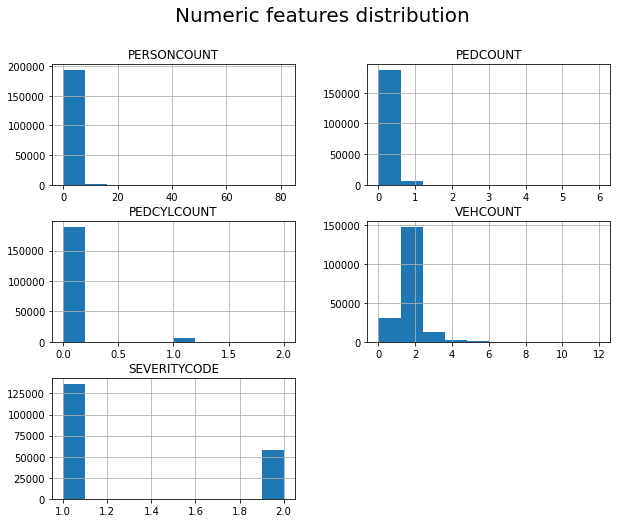

In [10]:
numeric_features.hist(figsize=[10,8])
plt.suptitle("Numeric features distribution", fontsize=20)
plt.show()

#### Categorical Features Distribution

##### "SEVERITYDESC" (Accident Severity Description)

<AxesSubplot:>

(array([0, 1]),
 [Text(0, 0, 'Property Damage Only Collision'),
  Text(1, 0, 'Injury Collision')])

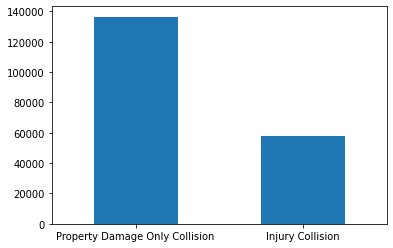

In [11]:
df['SEVERITYDESC'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

##### "COLLISIONTYPE"

<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Angles'),
  Text(1, 0, 'Sideswipe'),
  Text(2, 0, 'Parked Car'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Cycles'),
  Text(5, 0, 'Rear Ended'),
  Text(6, 0, 'Head On'),
  Text(7, 0, 'Left Turn'),
  Text(8, 0, 'Pedestrian'),
  Text(9, 0, 'Right Turn')])

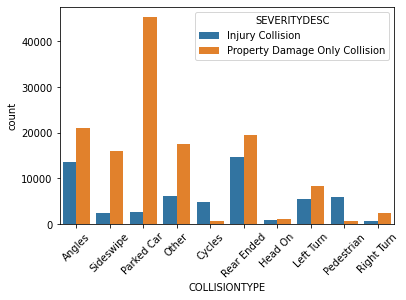

In [12]:
# Collision Type
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

##### "LIGHTCOND"

<AxesSubplot:xlabel='LIGHTCOND', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Daylight'),
  Text(1, 0, 'Dark - Street Lights On'),
  Text(2, 0, 'Dark - No Street Lights'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Dusk'),
  Text(5, 0, 'Dawn'),
  Text(6, 0, 'Dark - Street Lights Off'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Dark - Unknown Lighting')])

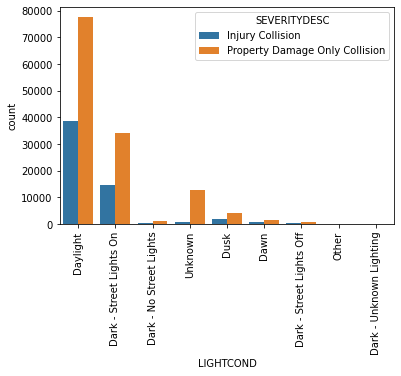

In [13]:
# LIGHT CONDITIONS
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

##### "ROADCOND"

<AxesSubplot:xlabel='ROADCOND', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Wet'),
  Text(1, 0, 'Dry'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Snow/Slush'),
  Text(4, 0, 'Ice'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Sand/Mud/Dirt'),
  Text(7, 0, 'Standing Water'),
  Text(8, 0, 'Oil')])

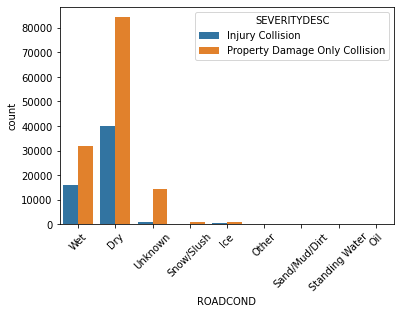

In [14]:
# ROAD CONDITIONS
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='ADDRTYPE', ylabel='count'>

(array([0, 1, 2]),
 [Text(0, 0, 'Intersection'), Text(1, 0, 'Block'), Text(2, 0, 'Alley')])

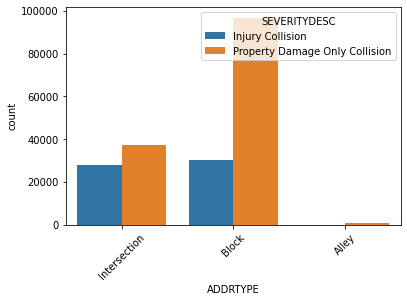

In [15]:
# ADDRTYPE (Address Type)
sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

##### "WEATHER"

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


<AxesSubplot:xlabel='WEATHER', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Overcast'),
  Text(1, 0, 'Raining'),
  Text(2, 0, 'Clear'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Snowing'),
  Text(6, 0, 'Fog/Smog/Smoke'),
  Text(7, 0, 'Sleet/Hail/Freezing Rain'),
  Text(8, 0, 'Blowing Sand/Dirt'),
  Text(9, 0, 'Severe Crosswind'),
  Text(10, 0, 'Partly Cloudy')])

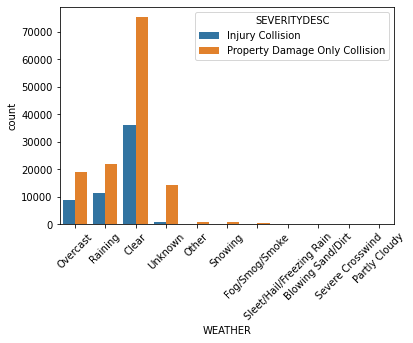

In [16]:
# WEATHER
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

##### "JUNCTIONTYPE"

<AxesSubplot:xlabel='JUNCTIONTYPE', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'At Intersection_related to intersection'),
  Text(1, 0, 'Mid-Block (not related to intersection)'),
  Text(2, 0, 'Driveway Junction'),
  Text(3, 0, 'Mid-Block (but intersection related)'),
  Text(4, 0, 'At Intersection_not related to intersection'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Ramp Junction')])

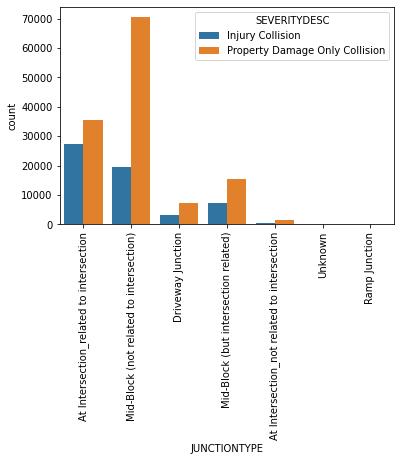

In [17]:
# Junction Type

sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

##### "UNDERINFL" (Under Influence of Alcohol/Drugs)

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

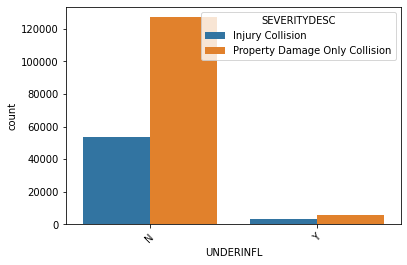

In [60]:
# UNDER INFLUENCE OF Alcohol/Drugs
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

#### Scatter plot of the accident coordinates

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

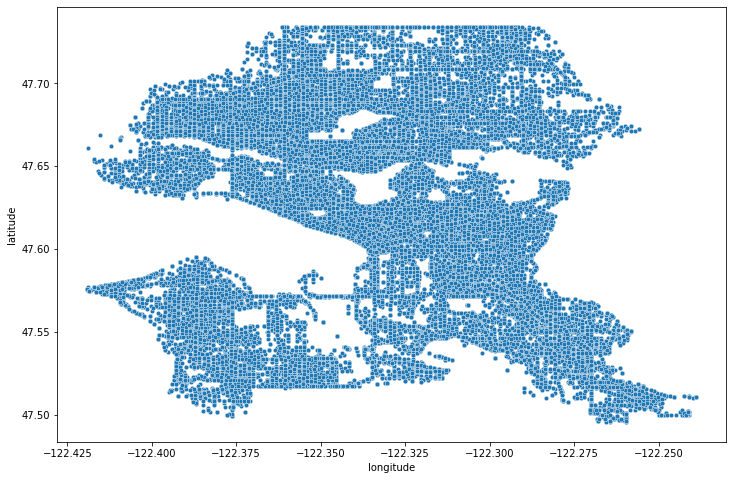

In [61]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x='longitude', y='latitude', data=df, legend=False, s=20)
plt.show()

### Data Preparation

#### Formatting the Date & time for the analysis

In [19]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
df['Month']=df['INCDTTM'].dt.strftime('%b')
df['Day']=df['INCDTTM'].dt.day
df['Hour']=df['INCDTTM'].dt.hour
df['Weekday']=df['INCDTTM'].dt.strftime('%a')

#### Yearly Distribution of number of accidents

2004    11865
2005    15115
2006    15188
2007    14456
2008    13660
2009    11734
2010    10808
2011    10919
2012    10907
2013    10577
2014    11841
2015    12995
2016    11659
2017    10873
2018    10419
2019     9412
2020     2245
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

<AxesSubplot:xlabel='Year', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2007'),
  Text(4, 0, '2008'),
  Text(5, 0, '2009'),
  Text(6, 0, '2010'),
  Text(7, 0, '2011'),
  Text(8, 0, '2012'),
  Text(9, 0, '2013'),
  Text(10, 0, '2014'),
  Text(11, 0, '2015'),
  Text(12, 0, '2016'),
  Text(13, 0, '2017'),
  Text(14, 0, '2018'),
  Text(15, 0, '2019'),
  Text(16, 0, '2020')])

Text(0.5, 1.0, 'Car accidents in Seattle by Year')

Text(0.5, 1.0, 'Car accidents in Seattle by Year & type')

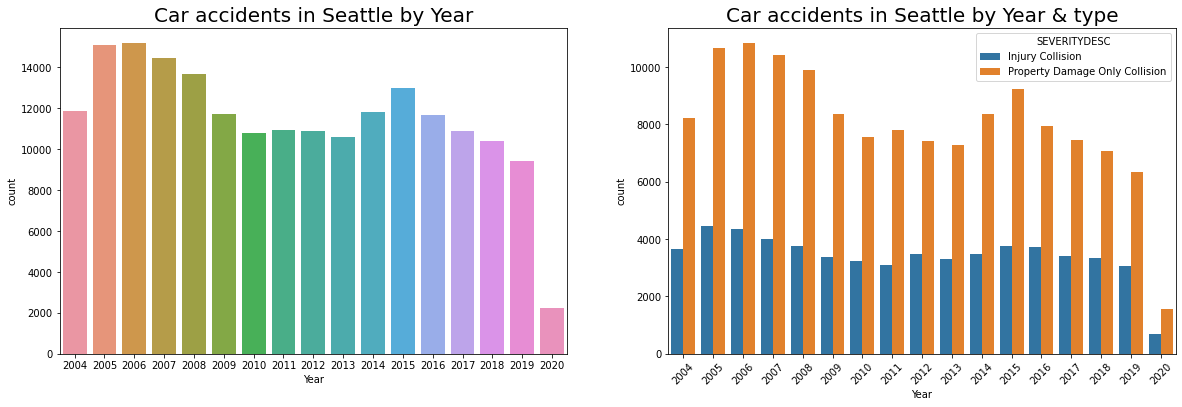

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

df['Year'] = pd.DatetimeIndex(df['INCDATE']).year
df['Year'].value_counts().sort_index()

sns.countplot(x="Year", data=df, ax=ax1)
sns.countplot(x="Year", hue="SEVERITYDESC", data=df, ax=ax2)

plt.xticks(rotation=45)
ax1.set_title('Car accidents in Seattle by Year', fontsize=20)
ax2.set_title('Car accidents in Seattle by Year & type', fontsize=20)

#### Checking the Null values in the Dataframe

In [21]:
df.isnull()

,SEVERITYCODE,longitude,latitude,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Month,Day,Hour,Weekday,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
194669,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
194670,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
194671,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False


#### Selecting and finalizing the features for Machine Learning Model

In [22]:
selected_features = ["SEVERITYCODE", "longitude", "latitude", "PERSONCOUNT",
                     "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "ADDRTYPE", "COLLISIONTYPE", "WEATHER", "ROADCOND",
                     "LIGHTCOND", "SDOT_COLDESC", "HITPARKEDCAR", "Hour"]
df_sel=df[selected_features].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   194673 non-null  int64  
 1   longitude      189339 non-null  float64
 2   latitude       189339 non-null  float64
 3   PERSONCOUNT    194673 non-null  int64  
 4   PEDCOUNT       194673 non-null  int64  
 5   PEDCYLCOUNT    194673 non-null  int64  
 6   VEHCOUNT       194673 non-null  int64  
 7   ADDRTYPE       192747 non-null  object 
 8   COLLISIONTYPE  189769 non-null  object 
 9   WEATHER        189592 non-null  object 
 10  ROADCOND       189661 non-null  object 
 11  LIGHTCOND      189503 non-null  object 
 12  SDOT_COLDESC   194673 non-null  object 
 13  HITPARKEDCAR   194673 non-null  object 
 14  Hour           194673 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 22.3+ MB


In [23]:
df.isnull().sum()

SEVERITYCODE           0
longitude           5334
latitude            5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
Month                  0
Day                    0
Hour                   0


In [24]:
df_sel.shape

(194673, 15)

#### Checking the Null values in the selected dataframe and dropping the rows with the null values

In [25]:
df_sel.isnull().mean()

SEVERITYCODE     0.000000
longitude        0.027400
latitude         0.027400
PERSONCOUNT      0.000000
PEDCOUNT         0.000000
PEDCYLCOUNT      0.000000
VEHCOUNT         0.000000
ADDRTYPE         0.009894
COLLISIONTYPE    0.025191
WEATHER          0.026100
ROADCOND         0.025746
LIGHTCOND        0.026557
SDOT_COLDESC     0.000000
HITPARKEDCAR     0.000000
Hour             0.000000
dtype: float64

In [26]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(184146, 15)

In [27]:
# Export the data with selected features

df_sel.to_csv('./Data-Collisions_clean_sel.csv',index=False)

#### Generating the dummies for the Categorical Data

In [28]:
# Generate dummies for categorical data
df_dummy = pd.get_dummies(df_sel, drop_first=True)
# Export data
df_dummy.to_csv("./Data-Collisions_{}_dummy.csv", index=False)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184146 entries, 0 to 194672
Data columns (total 83 columns):
 #   Column                                                                     Non-Null Count   Dtype  
---  ------                                                                     --------------   -----  
 0   SEVERITYCODE                                                               184146 non-null  int64  
 1   longitude                                                                  184146 non-null  float64
 2   latitude                                                                   184146 non-null  float64
 3   PERSONCOUNT                                                                184146 non-null  int64  
 4   PEDCOUNT                                                                   184146 non-null  int64  
 5   PEDCYLCOUNT                                                                184146 non-null  int64  
 6   VEHCOUNT                                    

### Modelling

In [29]:
# Assign the data
df=df_dummy
# Set the target for the prediction
target="SEVERITYCODE"
# Create arrays for the features and the response variable
# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33, stratify=y)

#### Selecting the different Algorithms

In [30]:
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

In [31]:
# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

### Evaluation

#### Logistic Regression

In [32]:
# Logistic regression
lr = LogisticRegression(solver='lbfgs', max_iter=1000, dual=False).fit(X_test, y_test)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.756.


c:\users\salma\desktop\projects\venv\new\new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### K-NN Neighbors

In [33]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)
print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

KNeighborsClassifier(n_neighbors=6)

[K-Nearest Neighbors (KNN)] knn.score: 0.739.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.739.


##### Setting arrays for storing the train and test data accuracies

In [34]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

##### Generating a plot for K-NN with varying number of Neighbors

Text(0.5, 1.0, 'k-NN: Varying Number of Neighbors')

Text(0.5, 0, 'Number of Neighbors')

Text(0, 0.5, 'Accuracy')

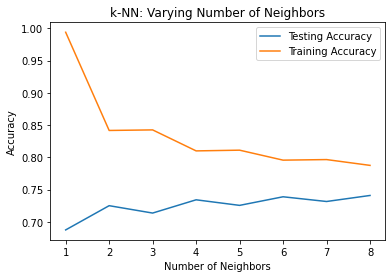

In [35]:
# Generate plot

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Decision Tree Algorithm

##### Instantiate dt_entropy & dt_gini by setting them as the information criterion

In [36]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set

dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

[Decision Tree -- entropy] accuracy_score: 0.754.


DecisionTreeClassifier(max_depth=8, random_state=1)

[Decision Tree -- gini] accuracy_score: 0.754.


#### Random Forest Algorithm

In [37]:
# Random Forest algorithm

# Create a Gaussian Classifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

# Model Accuracy, how often is the classifier correct?

print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc))

RandomForestClassifier()

[Random forest algorithm] accuracy_score: 0.736.


##### Random Forest Classifier

In [38]:
# Create a selector object that will use the random forest classifier to identify

# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.03)

longitude
latitude
PERSONCOUNT
Hour
COLLISIONTYPE_Parked Car


##### Visualizing the important features

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


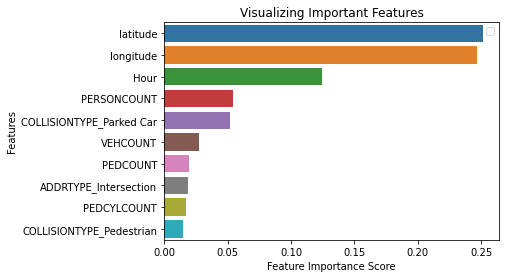

In [39]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

##### Creating a new Random Forest Classifier for the most important features

In [40]:
# Transform the data to create a new dataset containing only the most important features

# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

##### Checking the Accuracy of Random Forest Algorithm with full and the limited features

In [41]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Random forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Random forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))


[Random forest algorithm -- Full feature] accuracy_score: 0.736.
[Random forest algorithm -- Limited feature] accuracy_score: 0.661.


#### Making a plot of the accuracy scores for different algorithms

Text(0.755802794187826, -0.04999999999999999, '0.74')

Text(0.7589458440981421, 0.95, '0.74')

Text(0.7740686863367836, 1.95, '0.75')

Text(0.7760269216212213, 2.95, '0.76')

(0.0, 1.1)

Text(0.5, 0, 'Accuracy Score')

([<matplotlib.axis.YTick at 0x1e0115b3610>,
 [Text(0, 0, 'Random Forest'),
  Text(0, 1, ' K-Nearest Neighbors'),
  Text(0, 2, 'Decision Trees'),
  Text(0, 3, 'Logistic Regression')])

Text(0.5, 1.0, 'Accuracy Score of each Algorithm')

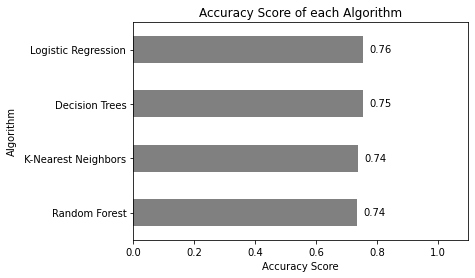

In [42]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv', index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Accuracy Score of each Algorithm')

plt.show()

### Deployment
For the deployment phase as it can vary from project to project a simple pdf report has been generated.

### Summary
*  Seattle road accidents data has been analyzed in order to get useful insights.
*  The data contains multiple attributes e.g. accident severity, collision type, coordinates of the incident,
   date and time of the incident, weather and road conditions, address types, no of persons injured and property
   damage and many other attributes.
*  There are two accident severity types mentioned in the dataset i.e.
      * Property damage only collision(1)
      * Injury collision(2)
*  All the mandatory Cross-industry standard process for data mining CRISP-DM phases are covered in this report which contains the following:
      * Business Understanding
      * Data Understanding
      * Data Preparation
      * Modeling
      * Evaluation
      * Deployment
*  In the Modeling phase, four algorithms were selected where the target class was "accident severity".
*  Based on the predictions, "Logistic Regression" relatively performed better among the others having the accuracy percentage of approx.76%.

### Conclusion
Based on the selected dataset(features) for this capstone project which includes mainly, coordinates, hour, person count and the collision type, it can be concluded that these particular classes have a somewhat impact on whether or not travelling along the Seattle roads could result in property damage (class 1) or injury (class 2).
In this study, the technique of association rules with a large set of accident data to identify the reasons of road accidents were used.The results show that this model could provide good predictions against traffic accident with approx. 76% correct rate.It should be noted that due to the constraints of data and research condition, there are still some factors, such as engine capacity, traffic flows, gender, age of the driver, attaining the missing data etc. that are not considered in this model and can be taken into account for future study. The results of this study can be used in vehicle safety assistance driving and provide early warnings and proposals for safe driving,  hence help in reducing the number of accidents.